<a href="https://colab.research.google.com/github/zd2011/foundML/blob/main/proj5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron
from sklearn import model_selection, metrics
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, MDS
from sklearn import cluster  # Clustering algorithms such as K-means and agglomerative
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
import math
from IPython import display
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#importing data as dataframe
df = pd.read_csv('/content/gdrive/MyDrive/DS/ML/wines.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


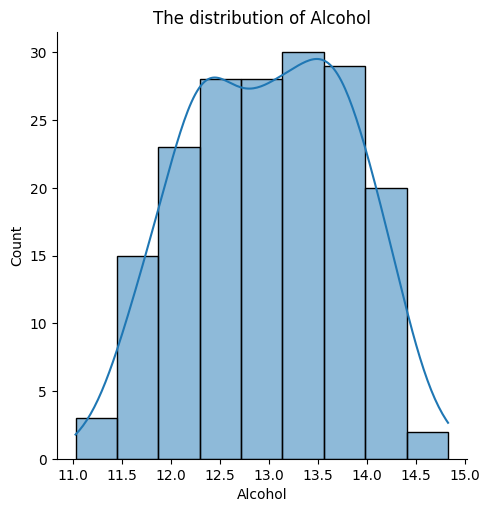

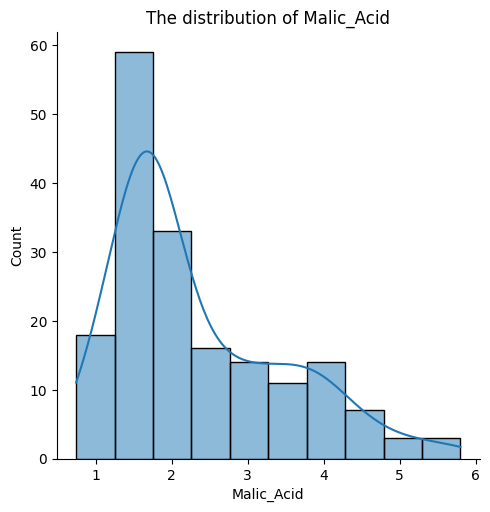

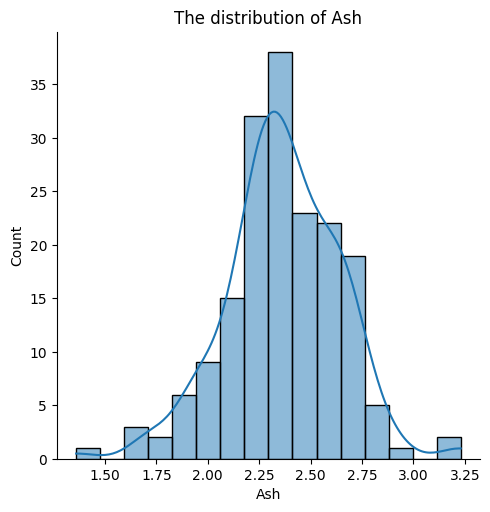

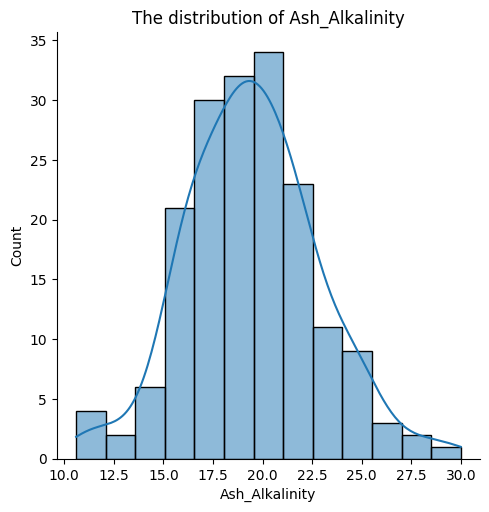

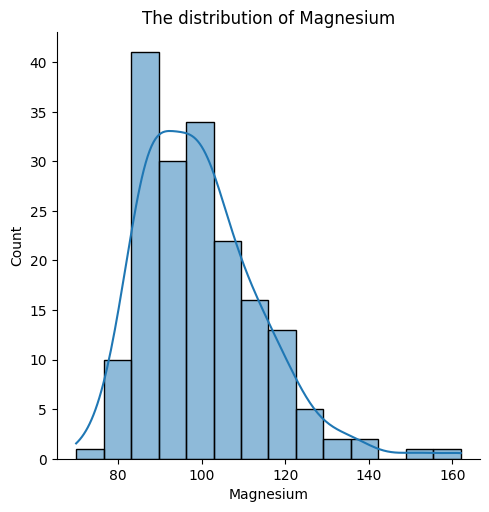

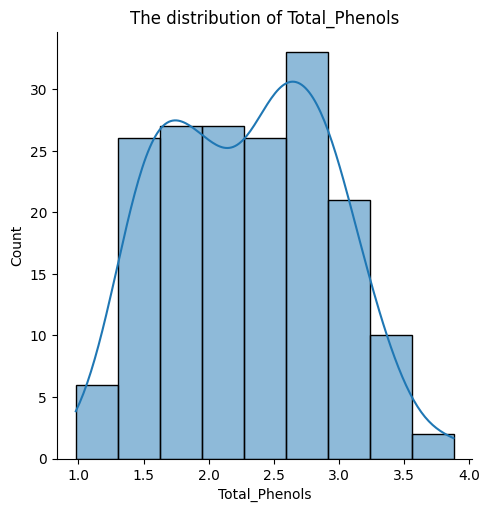

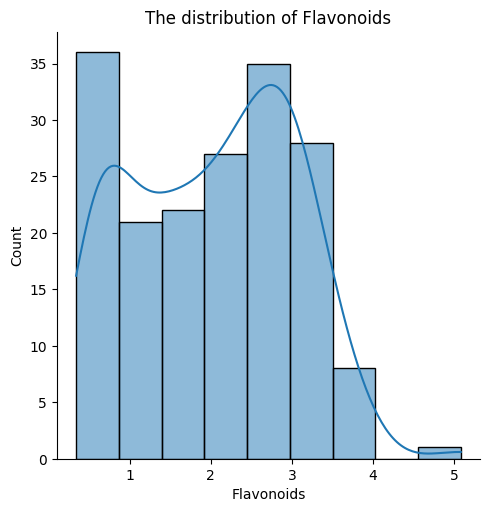

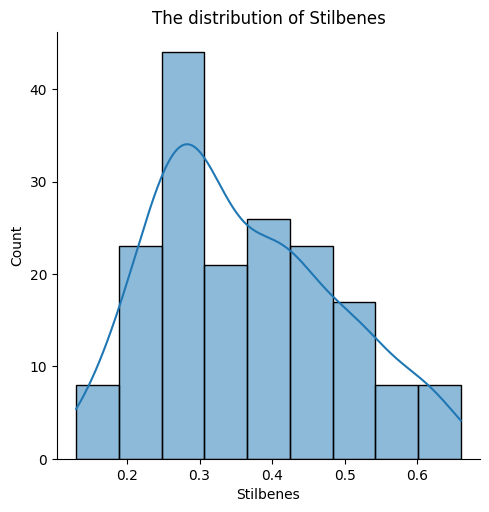

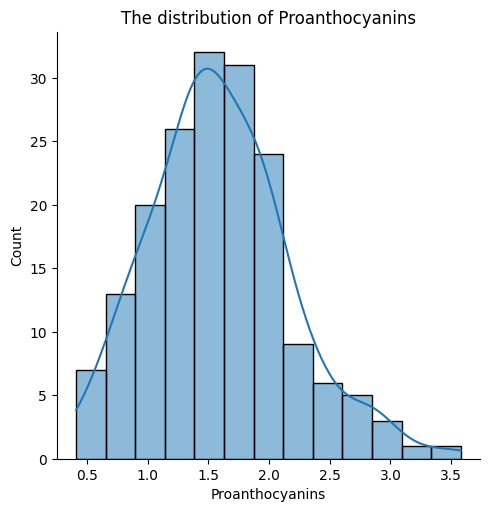

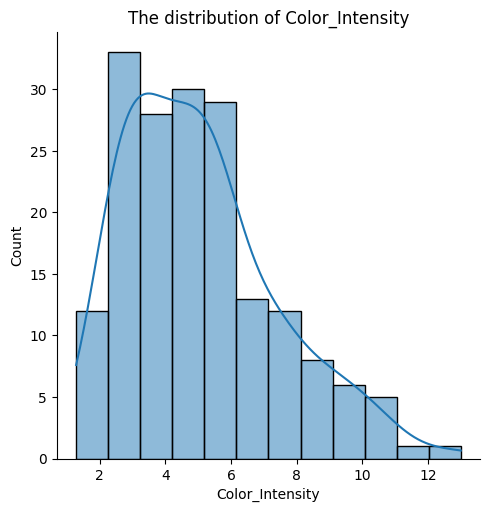

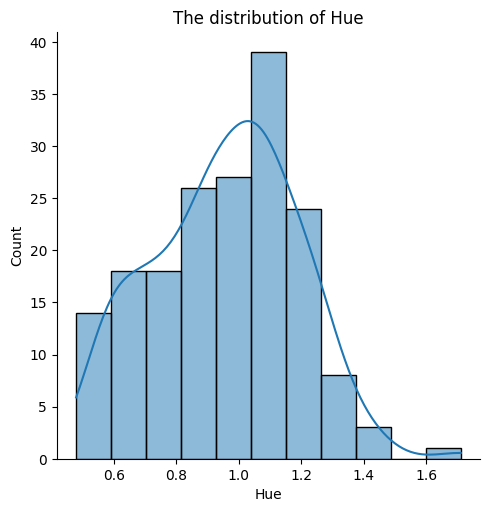

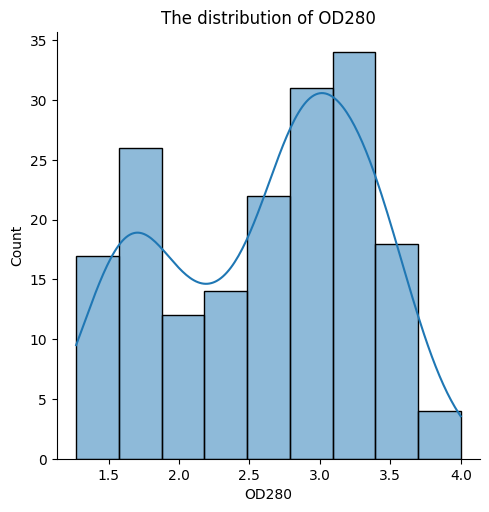

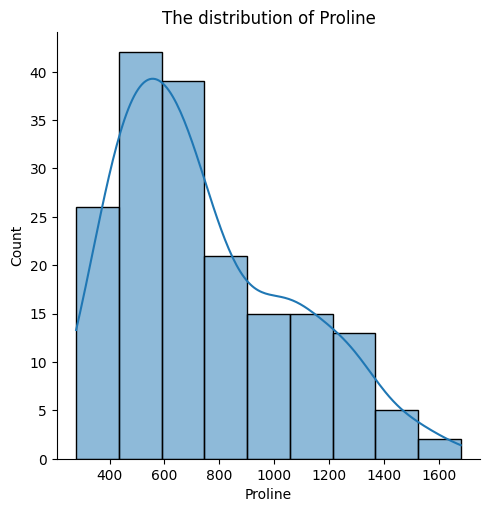

In [ ]:
#plotting distributions of each attribute
for i in df.columns: 
  sns.displot(data = df, x = i, kde = True)
  plt.title('The distribution of {}'.format(i))
  plt.show()

In [ ]:
#standaidize data
scaler = StandardScaler()
df_std = scaler.fit_transform(df)
df_std = pd.DataFrame(df_std, columns = df.columns)
df_std.head()

,Alcohol,Malic_Acid,Ash,Ash_Alkalinity,Magnesium,Total_Phenols,Flavonoids,Stilbenes,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# 1. Do a PCA on the data. How many Eigenvalues are above 1? Plotting the 2D solution (projecting the data on the first 2 principal components), how much of the variance is explained by these two dimensions, and how would you interpret them?

In [ ]:
#PCA showing first 4 principal components
pca = PCA(n_components=4, whiten=True)
#fitting standardized data
pca_data = pca.fit(df_std)

In [ ]:
#first 4 dimention of components
X_pca = pca.transform(df_std)
df_pca = pd.DataFrame(X_pca, columns= ['component_1', 'component_2', 'component_3',
                                        'component_4'])
df_pca.head()

,component_1,component_2,component_3,component_4
0,1.524651,-0.910909,-0.137438,-0.224304
1,1.015651,0.210390,-1.680425,-0.303077
2,1.156900,-0.650717,0.814995,0.754058
3,1.727056,-1.739432,-0.146106,0.590827
4,0.463777,-0.548914,1.680616,-0.426246


3 eigenvalues above 1


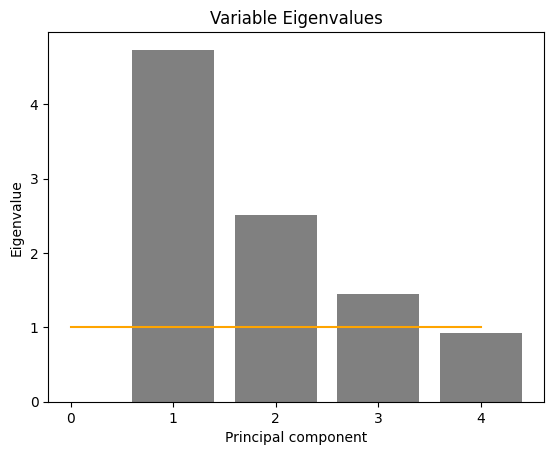

In [ ]:
#get eigenvalues for each principal component
eigVals = pca_data.explained_variance_

eigVals_above_1 = eigVals[eigVals > 1]
#
num_eigVals_above_1 = len(eigVals_above_1)

print("{} eigenvalues above 1".format(num_eigVals_above_1))

#plotting first 4 principal components
num_variable = 4
x_variables = np.linspace(1,num_variable,num_variable)
plt.bar(x_variables, eigVals, color='gray')
plt.plot([0,num_variable],[1,1],color='orange')
plt.title("Variable Eigenvalues")
plt.xlabel('Principal component')
plt.ylabel('Eigenvalue')
plt.show()

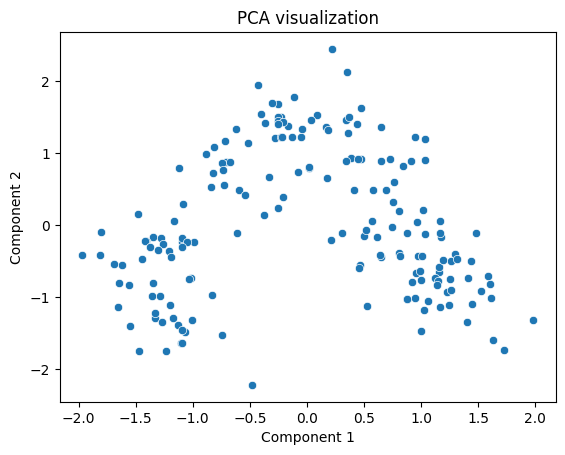

In [ ]:
#showing frist 2 components and reduced dimensions
sns.scatterplot(data=df_pca, x='component_1', y='component_2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA visualization')
plt.show()

In [ ]:
#sum up variance explained by first 2 components
var_exp = np.sum(pca.explained_variance_ratio_[:2])
print("Explained variance by the first two dimensions: {:0.2f}%".format(var_exp*100))

Explained variance by the first two dimensions: 55.41%


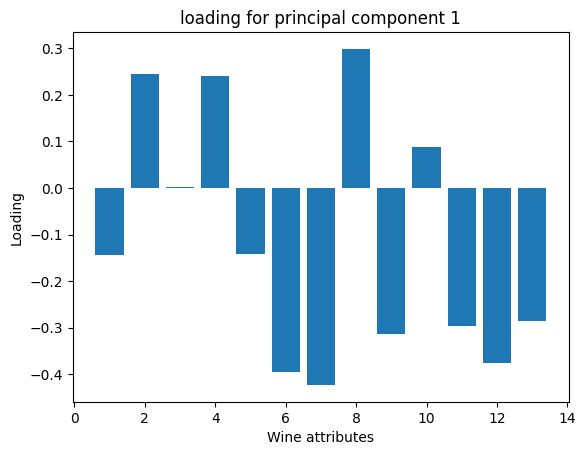

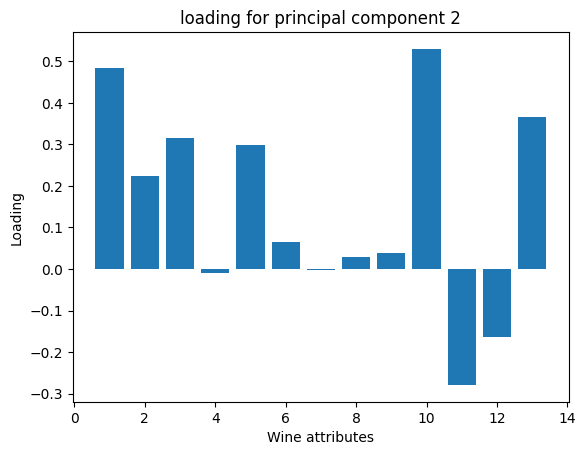

In [ ]:
#get loadings for each principal components
loadings = pca.components_
for i in [0,1]: 
  attr = np.linspace(1,13,13)
  plt.bar(attr,loadings[i,:]*-1) # note: eigVecs multiplied by -1 because the direction is arbitrary
  plt.xlabel('Wine attributes')
  plt.ylabel('Loading')
  plt.title('loading for principal component {}'.format(i+1))
  plt.show() # Show bar plot

# 2. Use t-SNE on the data. How does KL-divergence depend on Perplexity (vary Perplexity from 5 to 150)? Make sure to plot this relationship. Also, show a plot of the 2D component with a Perplexity of 20.

In [ ]:
#loop over value from 10 to 150, each with increase of 10
perplexities = np.arange(10, 155, 10)
#add 5 to the array, so iterate over perplexities 5，10，20...150
perplexities = np.insert(perplexities, 0, 5)
kl_div = []

for i in perplexities:
  #initiate tsne
  tsne = TSNE(n_components=2, perplexity=i, n_jobs=-1)
  #fitting 
  df_tsne = tsne.fit_transform(df_std)
  #calculate kl_divergence score
  kl_div.append(tsne.kl_divergence_)

In [ ]:
df_tsne_p = pd.DataFrame(kl_div, columns= ['kl_div_score'])
df_tsne_p['perplexity'] = perplexities
df_tsne_p.head()

,kl_div_score,perplexity
0,0.639459,5
1,0.584340,10
2,0.450697,20
3,0.367039,30
4,0.289198,40


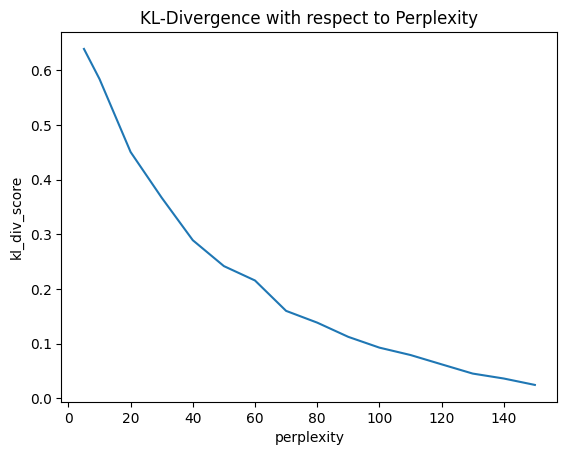

In [ ]:
#plotting kl divergence score
sns.lineplot(data = df_tsne_p, x="perplexity", y="kl_div_score")
plt.xlabel('perplexity')
plt.ylabel('kl_div_score')
plt.title('KL-Divergence with respect to Perplexity')
plt.show()

In [ ]:
#tsne with perplexity 20
tsne = TSNE(n_components=2, perplexity=20, n_jobs=-1)
X_tsne = tsne.fit_transform(df_std)

df_tsne = pd.DataFrame(X_tsne, columns= ['component_1', 'component_2'])
df_tsne.head()

,component_1,component_2
0,20.869349,2.669654
1,13.726685,2.661029
2,16.509651,9.610718
3,21.631763,8.002417
4,10.459221,11.964904


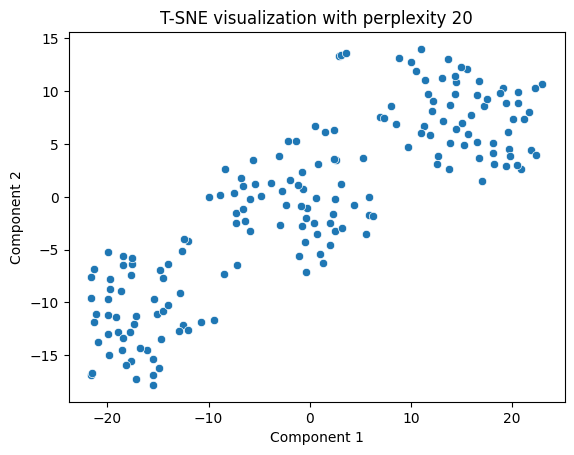

In [ ]:
#tsne with perplexity 20 visualization 
sns.scatterplot(data=df_tsne, x='component_1', y='component_2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('T-SNE visualization with perplexity 20')
plt.show()

# 3. Use MDS on the data. Try a 2-dimensional embedding. What is the resulting stress of this embedding? Also, plot this solution and comment on how it compares to t-SNE.

In [ ]:
mds = MDS(n_components=2, n_init=100, max_iter = 10000, normalized_stress='auto') #Create the mds object
X_mds = mds.fit_transform(df_std) #Actually run the mds

df_mds = pd.DataFrame(X_mds, columns= ['component_1', 'component_2'])
df_mds.head()

,component_1,component_2
0,4.162708,0.089929
1,2.736286,-1.625726
2,3.116150,0.599997
3,4.867021,1.402239
4,1.235740,1.592346


In [ ]:
#get resulting stress of mds
stress = mds.stress_
print("resulting MDS stress is: {}".format(stress))

resulting MDS stress is: 21114.416895179398


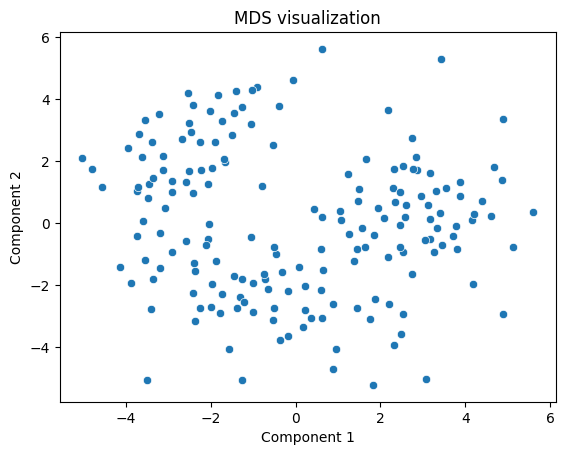

In [ ]:
#plotting mds visualization
sns.scatterplot(data=df_mds, x='component_1', y='component_2')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('MDS visualization')
plt.show()

# 4.Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use the Silhouette method to determine the optimal number of clusters and then use kMeans with that number (k) to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. What is the total sum of the distance of all points to their respective clusters centers, of this solution?

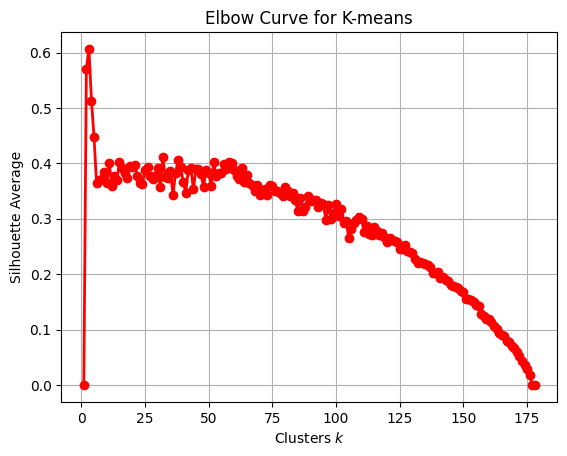

In [ ]:
silhouettes = np.zeros(len(df_tsne))

# iterate over all possible number of clusters
for k in range(2, len(df_tsne) - 1):
  #creating k means clustering and getting silhouette score
  kmeans = cluster.KMeans(k, n_init='auto')
  labels = kmeans.fit_predict(df_tsne)
  silhouettes[k-1] = silhouette_score(df_tsne, labels)
    
#plot silhouette score
plt.plot(np.arange(1, len(df_tsne)+1, 1), silhouettes, 'r-o', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Silhouette Average')
plt.title(r'Elbow Curve for K-means')
plt.grid()
plt.show()

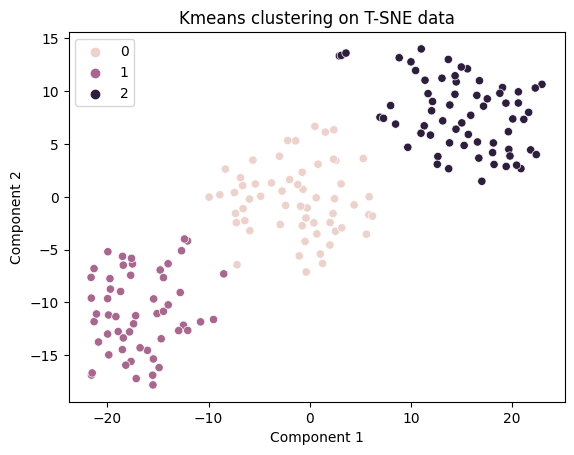

In [ ]:
#k means with 3 clusters
kmeans = cluster.KMeans(3, n_init='auto')
labels = kmeans.fit_predict(df_tsne)
centroids = kmeans.cluster_centers_

#showing cluster on tsne visualization
sns.scatterplot(data=df_tsne, x='component_1', y='component_2', hue = labels)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Kmeans clustering on T-SNE data')
plt.show()

In [ ]:
total_distance = 0
for i in range(len(df_tsne)):
    point = X_tsne[i]
    centroid = centroids[labels[i]]
    distance = math.dist(point,centroid)
    total_distance += distance

print("total sum of the distance of all points to their respective clusters centers is:", total_distance)

total sum of the distance of all points to their respective clusters centers is: 879.2247165239411


# Building on one of the dimensionality reduction methods above that yielded a 2D solution (1-3, your choice), use dBScan to produce a plot that represents each wine as a dot in a 2D space in the color of its cluster. Make sure to suitably pick the radius of the perimeter (“epsilon”) and the minimal number of points within the perimeter to form a cluster (“minPoints”) and comment on your choice of these two hyperparameters.

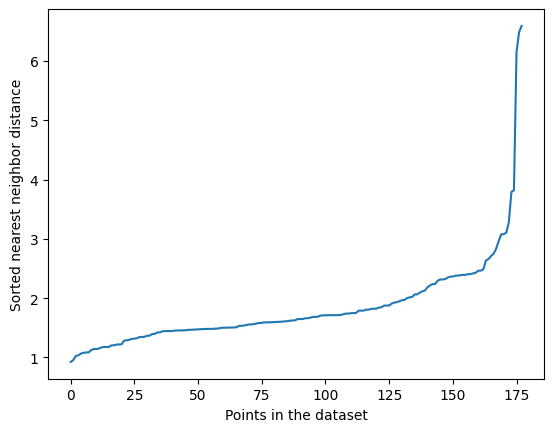

In [ ]:
#optimizing for episilon and number of neighbors, following linkes are used for reference
#https://www.kaggle.com/questions-and-answers/166388
#https://sackoverflow.com/questions/15050389/estimating-choosing-optimal-hyperparameters-for-dbscan

#we fix the number of neighbors = 4 and tune epsilon using knn algorithm
#the reference suggest number of neighbors should be around 2*number of dimensions
#in this case 4
neighbors = NearestNeighbors(n_neighbors=4)
neighbors.fit(df_tsne)
distances, indices = neighbors.kneighbors(df_tsne)
#see what epsilon values yields k-nearest neighbors distance for each points
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.xlabel("Points in the dataset")
plt.ylabel("Sorted nearest neighbor distance")
plt.show()

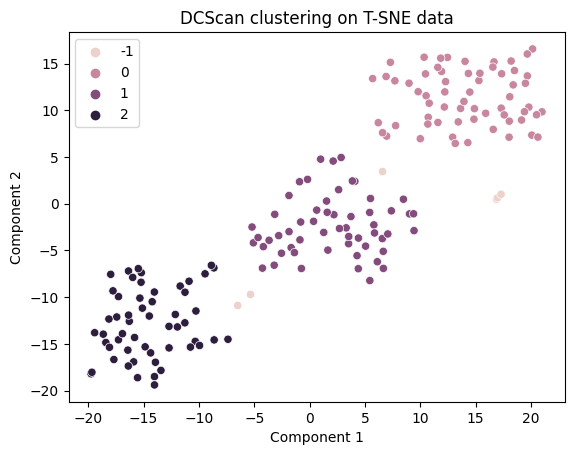

In [ ]:
#chosen epsilon and min_point value
epsilon = 2.7
min_points = 4

# Apply DBSCAN with the chosen hyperparameters
dbscan = DBSCAN(eps=epsilon, min_samples=min_points, metric='euclidean')
labels_db = dbscan.fit_predict(df_tsne)

#dbscan clustering on tse visualization
sns.scatterplot(data=df_tsne, x='component_1', y='component_2', hue = labels_db)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('DCScan clustering on T-SNE data')
plt.show()

# Extra Credit:

## a) Given your answers to all of these questions taken together, how many different kinds of wine do you think there are and how do they differ?

Using all three dimensionality results, we see that both T-SNE and MDS clearly reveals three different kinds of wine. Although PCA does not have that obvious distinction, there is still clue of three clusters of data. Clustering algorithms (both k means and DBSCAN) also revealed that 3 kinds of wine is the most approriate clustering of wine kinds. DBSCAN also labeled outlier points as another cluster. Using the T-SNE dimensionality reduction visualization as reference, we see that each of the three clusters have negative, positive, and around-zero values for component_1 and component_2.

## b) Is there anything of interest you learned about wines from exploring this dataset with unsupervised machine learning method that is worth noting and not already covered in the questions above?

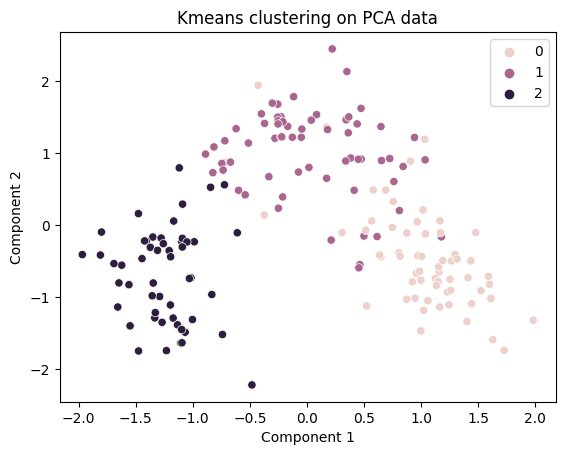

In [ ]:
#k means with PCA
kmeans_pca = cluster.KMeans(3, n_init='auto')
labels_pca = kmeans_pca.fit_predict(df_pca)
centroids_pca = kmeans_pca.cluster_centers_

#showing cluster on tsne visualization
sns.scatterplot(data=df_pca, x='component_1', y='component_2', hue = labels_pca)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Kmeans clustering on PCA data')
plt.show()

In [ ]:
total_distance = 0
for i in range(len(df_pca)):
    point = X_pca[i]
    centroids = centroids_pca[labels_pca[i]]
    distance = math.dist(point,centroids)
    total_distance += distance

print("total sum of the distance of all points to their respective clusters centers is:", total_distance)

total sum of the distance of all points to their respective clusters centers is: 244.93573964692567


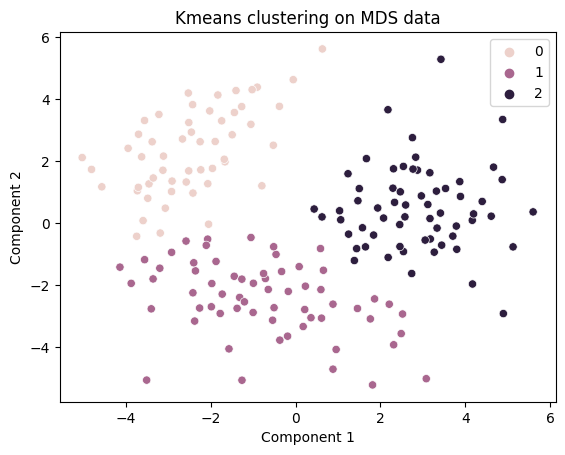

In [ ]:
#k means with MDS
kmeans_mds = cluster.KMeans(3, n_init='auto')
labels_mds = kmeans_mds.fit_predict(df_mds)
centroids_mds = kmeans_mds.cluster_centers_

#showing cluster on tsne visualization
sns.scatterplot(data=df_mds, x='component_1', y='component_2', hue = labels_mds)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Kmeans clustering on MDS data')
plt.show()

In [ ]:
total_distance = 0
for i in range(len(df_mds)):
    point = X_mds[i]
    centroids = centroids_mds[labels_mds[i]]
    distance = math.dist(point,centroids)
    total_distance += distance

print("total sum of the distance of all points to their respective clusters centers is:", total_distance)

total sum of the distance of all points to their respective clusters centers is: 299.51976418479643
